In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Bounce_Rate_by_Age.xlsx')
Data = pd.read_excel(xls, 'Data')

In [3]:
#Remove the dates for ease
A = Data['18-24']
B = Data['25-34']
C = Data['35-44']
D = Data['45-54']
E = Data['55-64']
F = Data['65+']

In [4]:
#convert datasets into arrays
A = A.values
B = B.values
C = C.values
D = D.values
E = E.values
F = F.values

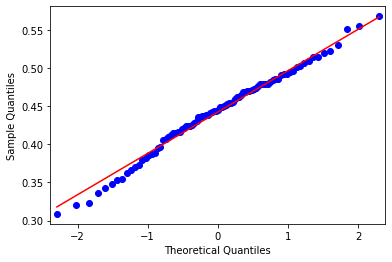

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(A, line='s')
pyplot.show()

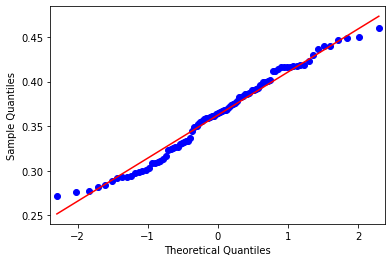

In [6]:
qqplot(B, line='s')
pyplot.show()

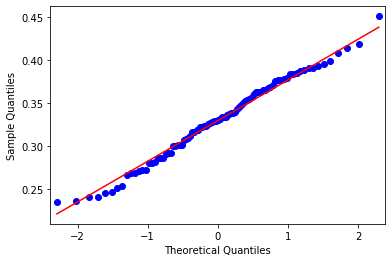

In [7]:
qqplot(C, line='s')
pyplot.show()

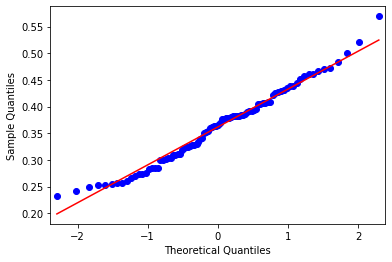

In [8]:
qqplot(D, line='s')
pyplot.show()

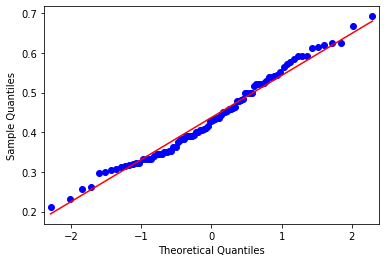

In [9]:
qqplot(E, line='s')
pyplot.show()

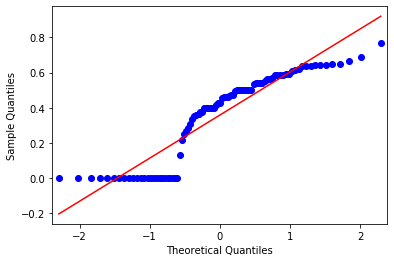

In [10]:
qqplot(F, line='s')
pyplot.show()

### Not all datasets look normal since most fall off the qq plot

In [11]:
names = ["18-24","25-34","35-44","45-54","55-64", "65+"]
for index, i in enumerate((A, B, C, D, E, F)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

18-24
Statistics=0.988, p=0.568
Sample looks Gaussian (fail to reject H0)
25-34
Statistics=0.972, p=0.049
Sample does not look Gaussian (reject H0)
35-44
Statistics=0.986, p=0.457
Sample looks Gaussian (fail to reject H0)
45-54
Statistics=0.980, p=0.173
Sample looks Gaussian (fail to reject H0)
55-64
Statistics=0.981, p=0.203
Sample looks Gaussian (fail to reject H0)
65+
Statistics=0.850, p=0.000
Sample does not look Gaussian (reject H0)


### Since not all datasets are normaly distributed non-parametric tests should be used.

In [12]:
#import Kruskal–Wallis test: Non parametric method for testing whether samples originate from the same distribution. 
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

In [13]:
stat, p = kruskal(A, B, C, D, E, F)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:    
    print('The difference between the datasets is not significant (fail to reject H0)')
else:
    print('The difference between the datasets is significant (reject H0)')

Statistics=118.704, p=0.000
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets

### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [14]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

### 18-24 to the rest

In [15]:
names = ["25-34","35-44","45-54","55-64", "65+"]
for index, i in enumerate((B, C, D, E, F)):
    stat, p = ranksums(A,i)
    print('18-24 -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

18-24 - 25-34
Statistics=8.393, p=0.000
The difference between the two datasets is significant (reject H0)
18-24 - 35-44
Statistics=10.140, p=0.000
The difference between the two datasets is significant (reject H0)
18-24 - 45-54
Statistics=7.336, p=0.000
The difference between the two datasets is significant (reject H0)
18-24 - 55-64
Statistics=0.936, p=0.349
The difference between the two datasets is not significant (fail to reject H0)
18-24 - 65+
Statistics=0.429, p=0.668
The difference between the two datasets is not significant (fail to reject H0)


### 25-34 to the rest

In [16]:

names = ["35-44","45-54","55-64", "65+"]
for index, i in enumerate((C, D, E, F)):
    stat, p = ranksums(B,i)
    print("25-34-",names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

25-34- 35-44
Statistics=4.138, p=0.000
The difference between the two datasets is significant (reject H0)
25-34- 45-54
Statistics=0.215, p=0.830
The difference between the two datasets is not significant (fail to reject H0)
25-34- 55-64
Statistics=-5.013, p=0.000
The difference between the two datasets is significant (reject H0)
25-34- 65+
Statistics=-2.495, p=0.013
The difference between the two datasets is significant (reject H0)


### 35-44 to the rest

In [17]:

names = ["45-54","55-64", "65+"]
for index, i in enumerate((D, E, F)):
    stat, p = ranksums(C,i)
    print('35-44 -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

35-44 - 45-54
Statistics=-3.167, p=0.002
The difference between the two datasets is significant (reject H0)
35-44 - 55-64
Statistics=-7.276, p=0.000
The difference between the two datasets is significant (reject H0)
35-44 - 65+
Statistics=-3.350, p=0.001
The difference between the two datasets is significant (reject H0)


### 45-54 to the rest

In [18]:

names = ["55-64", "65+"]
for index, i in enumerate((E, F)):
    stat, p = ranksums(D,i)
    print('45-54-',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

45-54- 55-64
Statistics=-4.868, p=0.000
The difference between the two datasets is significant (reject H0)
45-54- 65+
Statistics=-2.224, p=0.026
The difference between the two datasets is significant (reject H0)


### 55-64 to 65+

In [19]:

stat, p = ranksums(E,F)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=0.670, p=0.503
The difference between the two datasets is not significant (fail to reject H0)
